In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("DataScience_salaries_2024.csv",usecols = ['experience_level', 'job_title'])
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
2,MI,Data Scientist
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
...,...,...
14833,MI,Business Intelligence Developer
14834,EX,Staff Data Analyst
14835,EN,Machine Learning Developer
14836,EN,Data Analyst


In [3]:
df = df.dropna()
df = df.drop_duplicates()
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


## Đồ thị ban đầu 2 phía

In [4]:
import networkx as nx
from networkx.algorithms import bipartite

In [5]:
B = nx.Graph()
job_title = df['job_title']
experience_level = df['experience_level']
print(job_title.nunique())
print(experience_level.nunique())
print(len(df))

153
4
334


In [6]:
for index, row in df.iterrows():
    B.add_edge(row['job_title'], row['experience_level'], weight = 1)
B.add_nodes_from(job_title, bipartile = 0)
B.add_nodes_from(experience_level, bipartile = 1)

<Figure size 1200x1200 with 0 Axes>

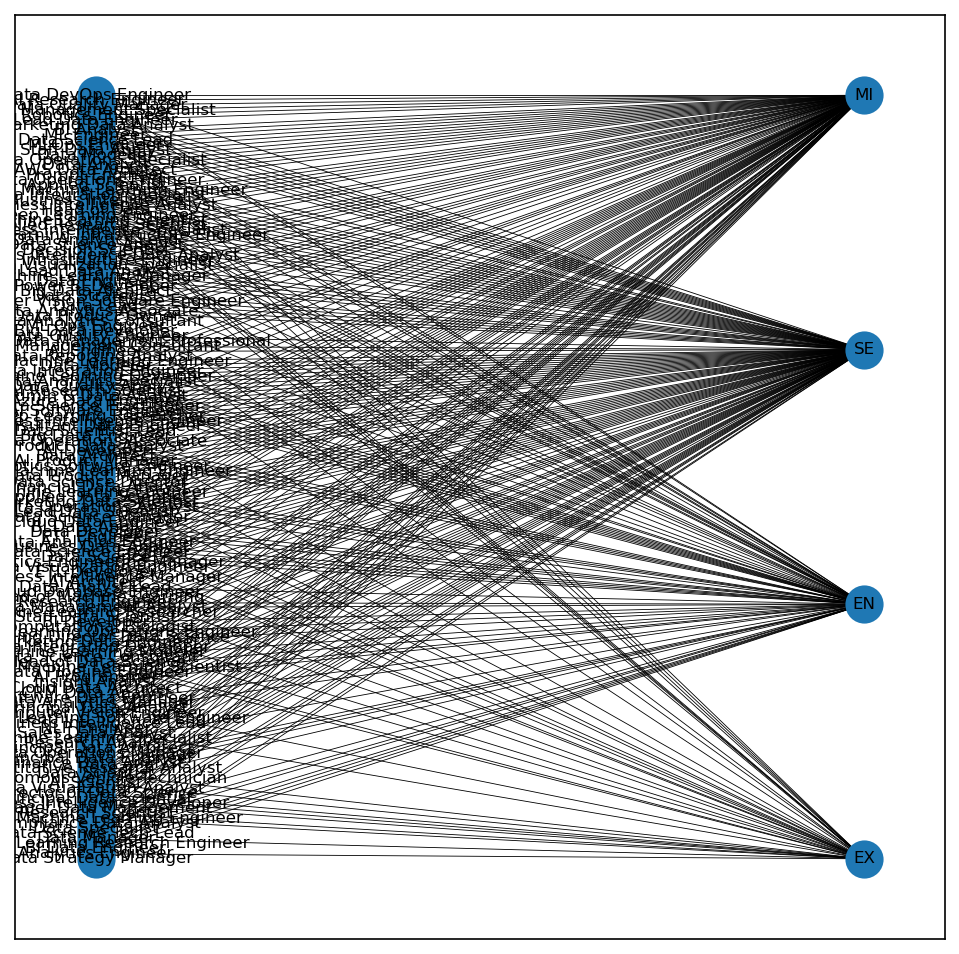

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B,job_title), font_size=8, width=0.4)
plt.show()

## Đồ thị 1 phía

In [8]:
job_title_col = df['job_title'].unique()

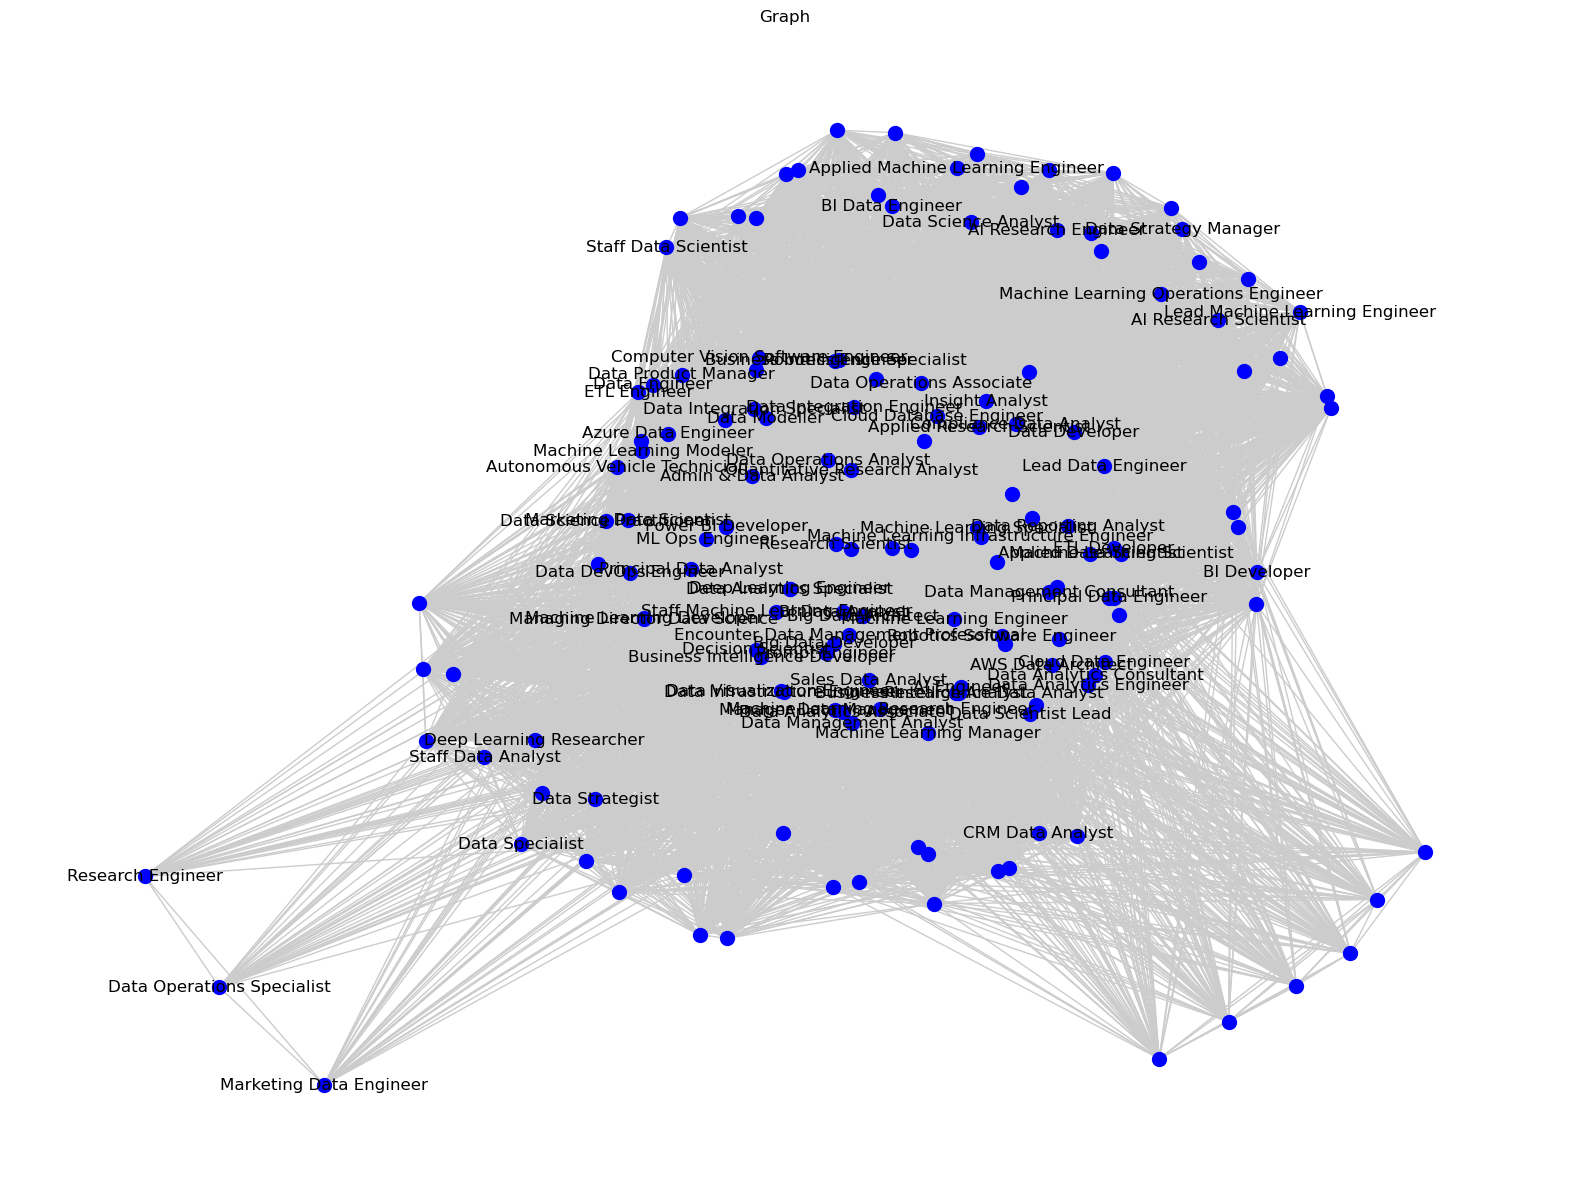

In [9]:
G = bipartite.weighted_projected_graph(B, job_title_col)
plt.figure(figsize=(20,15))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      layout,
                      nodelist= job_title_col,
                      node_size=100,
                      node_color='blue')
nx.draw_networkx_edges(G,layout, edge_color = '#cccccc')
node_labels = dict(zip(job_title, job_title_col))
nx.draw_networkx_labels(G,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [10]:
labels = nx.get_edge_attributes(G,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df2 = pd.DataFrame(data)
df2.to_csv(r'dothi1phia.csv', index = False, header = True)

## Trích ra 10 đỉnh ngẫu nhiên từ đồ thị

In [11]:
import random
random.seed(20)
random_nodes = random.sample(list(G.nodes()), 10)
random_nodes

['AI Engineer',
 'Data Product Manager',
 'Business Data Analyst',
 'Decision Scientist',
 'Compliance Data Analyst',
 'BI Analyst',
 'Research Engineer',
 'Data Quality Analyst',
 'Data Pipeline Engineer',
 'AI Research Engineer']

In [12]:
df2 = df.loc[df['job_title'].isin(random_nodes)]
df2

,experience_level,job_title
9,EN,Research Engineer
37,EN,AI Research Engineer
50,MI,Business Data Analyst
82,MI,Research Engineer
91,SE,Research Engineer
131,MI,AI Engineer
137,SE,AI Engineer
179,SE,BI Analyst
1104,MI,Data Product Manager
1421,EX,AI Engineer


In [13]:
B1 = nx.Graph()

In [14]:
for index, row in df2.iterrows():
    B1.add_edge(row['job_title'], row['experience_level'], weight = 1)
B1.add_nodes_from(random_nodes, bipartile = 0)
B1.add_nodes_from(experience_level, bipartile = 1)

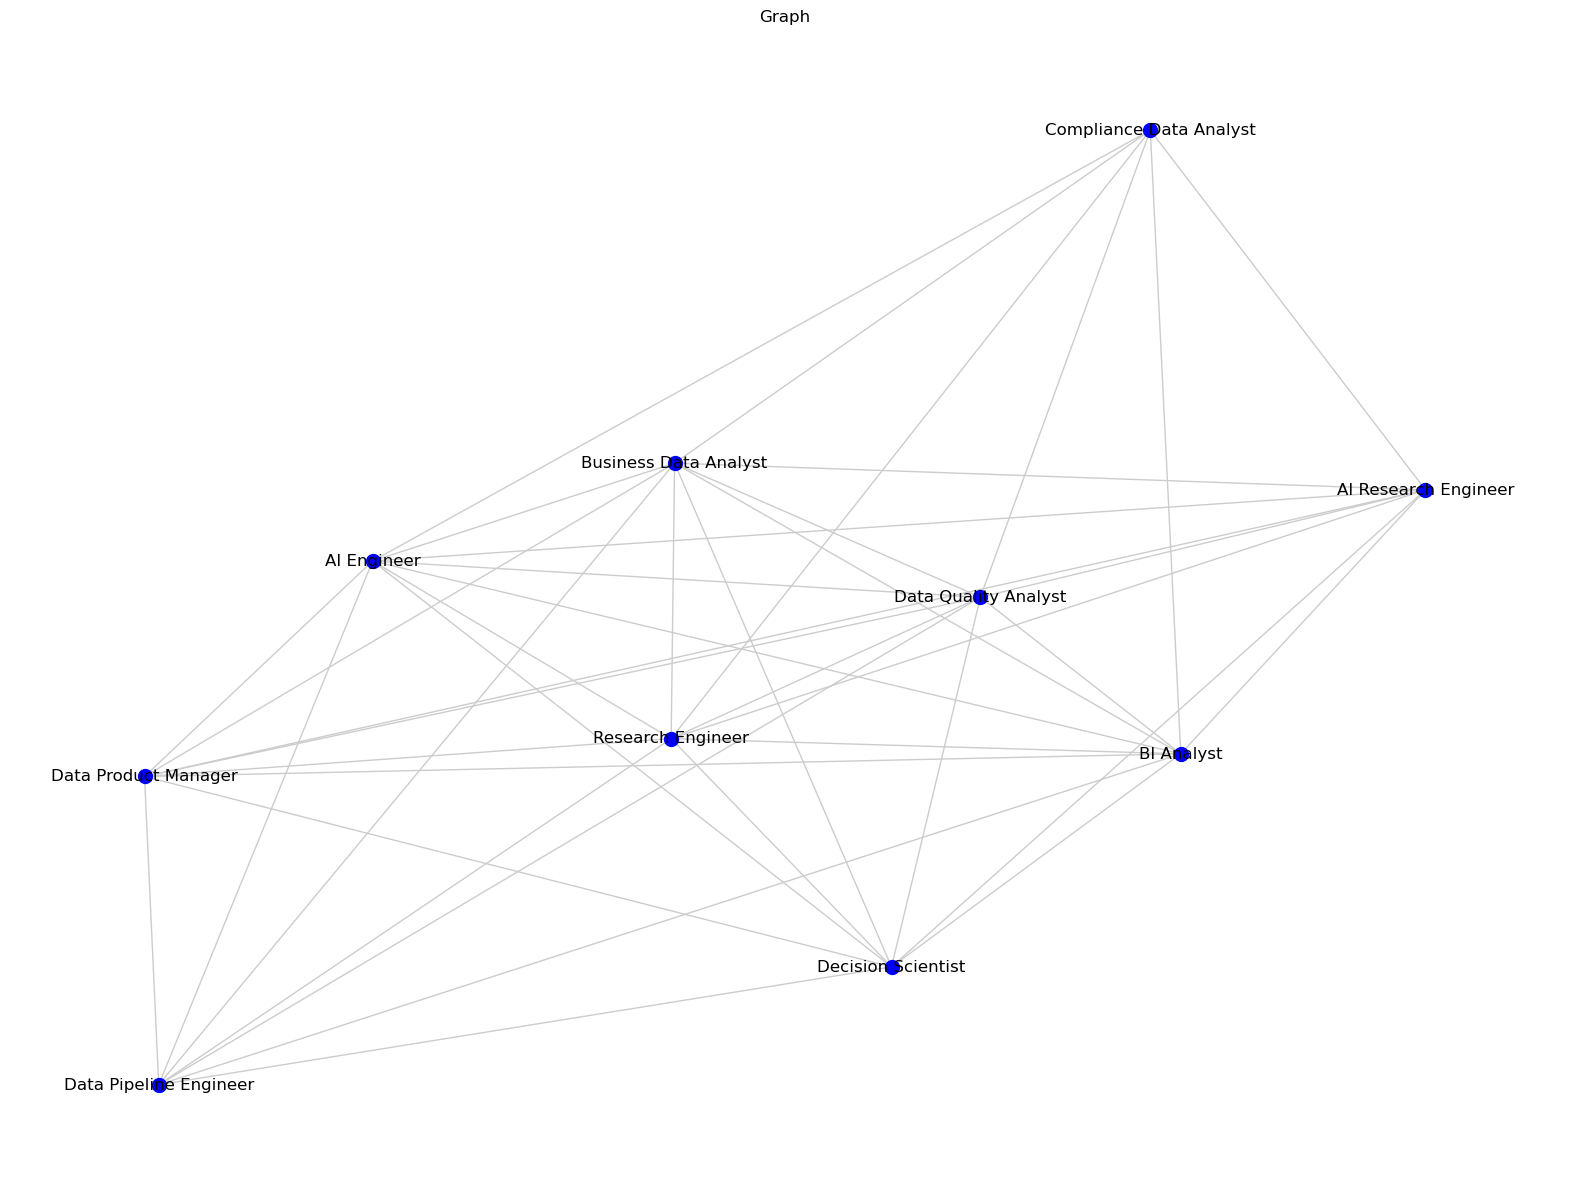

In [15]:
G1 = bipartite.weighted_projected_graph(B1, random_nodes)
plt.figure(figsize=(20,15))
layout = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1,
                      layout,
                      nodelist= random_nodes,
                      node_size=100,
                      node_color='blue')
nx.draw_networkx_edges(G1,layout, edge_color = '#cccccc')
node_labels = dict(zip(random_nodes, random_nodes))
nx.draw_networkx_labels(G1,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [16]:
labels = nx.get_edge_attributes(G1,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df3 = pd.DataFrame(data)
df3.to_csv(r'dothi1phia_10_dinh.csv', index = False, header = True)

## Harmonic

In [17]:
clustering = []
for node in G1.nodes():
    clustering.append(nx.harmonic_centrality(G1, [node]))
sorted_clusterings = sorted(clustering, key=lambda x: list(x.values())[0])
for cluster in sorted_clusterings:
    print(cluster)

{'Compliance Data Analyst': 7.5}
{'Data Pipeline Engineer': 8.0}
{'Data Product Manager': 8.5}
{'Decision Scientist': 8.5}
{'AI Research Engineer': 8.5}
{'AI Engineer': 9.0}
{'Business Data Analyst': 9.0}
{'BI Analyst': 9.0}
{'Research Engineer': 9.0}
{'Data Quality Analyst': 9.0}


## Page rank

In [18]:
page_rank = nx.pagerank(G1)
for node in sorted(page_rank, key=page_rank.get, reverse=True):
  print(node, page_rank[node]*10000)

AI Engineer 1259.590946198296
Business Data Analyst 1259.590946198296
BI Analyst 1259.590946198296
Research Engineer 1259.590946198296
Data Quality Analyst 1259.590946198296
Data Product Manager 917.4621074884767
Decision Scientist 917.4621074884767
AI Research Engineer 863.9031553921801
Data Pipeline Engineer 529.069072632577
Compliance Data Analyst 474.14882600681204


## Closeness Centrality

In [19]:
closeness_centrality = nx.closeness_centrality(G1)
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

AI Engineer 1.0
Business Data Analyst 1.0
BI Analyst 1.0
Research Engineer 1.0
Data Quality Analyst 1.0
Data Product Manager 0.9
Decision Scientist 0.9
AI Research Engineer 0.9
Data Pipeline Engineer 0.8181818181818182
Compliance Data Analyst 0.75


## Betweenness centrality

In [20]:
betweenness_centrality = nx.betweenness_centrality(G1)
sorted_betweeness = sorted(betweenness_centrality.items(), key = lambda x:x[1], reverse = True)
top_10_jobs = sorted_betweeness[:10]
for node, centrality in top_10_jobs:
      print(f"{node}: {centrality}")

AI Engineer: 0.018783068783068783
Business Data Analyst: 0.018783068783068783
BI Analyst: 0.018783068783068783
Research Engineer: 0.018783068783068783
Data Quality Analyst: 0.018783068783068783
AI Research Engineer: 0.009259259259259259
Data Product Manager: 0.003968253968253968
Decision Scientist: 0.003968253968253968
Compliance Data Analyst: 0.0
Data Pipeline Engineer: 0.0


In [21]:
betweeness = nx.edge_betweenness_centrality(G1)
sorted_betweeness = sorted(betweeness.items(), key = lambda x:x[1], reverse = True)
top_10_betweeness = sorted_betweeness[:10]
for edge,rank in top_10_betweeness:
    print(f"{edge}: {rank}")

('AI Engineer', 'Compliance Data Analyst'): 0.034074074074074076
('Business Data Analyst', 'Compliance Data Analyst'): 0.034074074074074076
('Compliance Data Analyst', 'Data Quality Analyst'): 0.034074074074074076
('Compliance Data Analyst', 'Research Engineer'): 0.034074074074074076
('Compliance Data Analyst', 'BI Analyst'): 0.034074074074074076
('AI Engineer', 'Data Pipeline Engineer'): 0.02984126984126984
('Business Data Analyst', 'Data Pipeline Engineer'): 0.02984126984126984
('BI Analyst', 'Data Pipeline Engineer'): 0.02984126984126984
('Research Engineer', 'Data Pipeline Engineer'): 0.02984126984126984
('Data Quality Analyst', 'Data Pipeline Engineer'): 0.02984126984126984


## Eigenvector & Eigenvalue

In [22]:
eigenvector_centrality = nx.eigenvector_centrality(G1)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key = lambda x:x[1], reverse = True)
top_10_eigenvector_centrality = sorted_eigenvector_centrality[:10]

In [23]:
adjacency_matrix = nx.adjacency_matrix(G1).T.toarray()
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
eigenvalue_centrality = np.abs(eigenvectors[:,0])/np.linalg.norm(eigenvectors[:,0])
sorted_eigenvalue_centrality = sorted(enumerate(eigenvalue_centrality), key = lambda x:x[1], reverse = True)
top_10_eigenvalue_centrality = sorted_eigenvalue_centrality[:10]

In [24]:
for node, centrality in top_10_eigenvector_centrality:
    print(f"Đỉnh {node}: {centrality}")

Đỉnh AI Engineer: 0.33855845178298755
Đỉnh Business Data Analyst: 0.33855845178298755
Đỉnh BI Analyst: 0.33855845178298755
Đỉnh Research Engineer: 0.33855845178298755
Đỉnh Data Quality Analyst: 0.33855845178298755
Đỉnh Data Product Manager: 0.312606571541661
Đỉnh Decision Scientist: 0.312606571541661
Đỉnh AI Research Engineer: 0.30849978325373023
Đỉnh Data Pipeline Engineer: 0.27941947139872675
Đỉnh Compliance Data Analyst: 0.24124215888838052


In [25]:
for node, centrality in top_10_eigenvalue_centrality:
    print(f"Đỉnh {node}: {centrality}")

Đỉnh 0: 0.38294450555395787
Đỉnh 2: 0.3829445055539576
Đỉnh 5: 0.3829445055539576
Đỉnh 6: 0.3829445055539576
Đỉnh 7: 0.3829445055539576
Đỉnh 3: 0.2818615139115176
Đỉnh 1: 0.28186151391151737
Đỉnh 9: 0.26526962021179823
Đỉnh 8: 0.14542028876795288
Đỉnh 4: 0.12790883663188843


## Louvain

/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_5357/1684852397.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('viridis', max(partition.values()) +1)


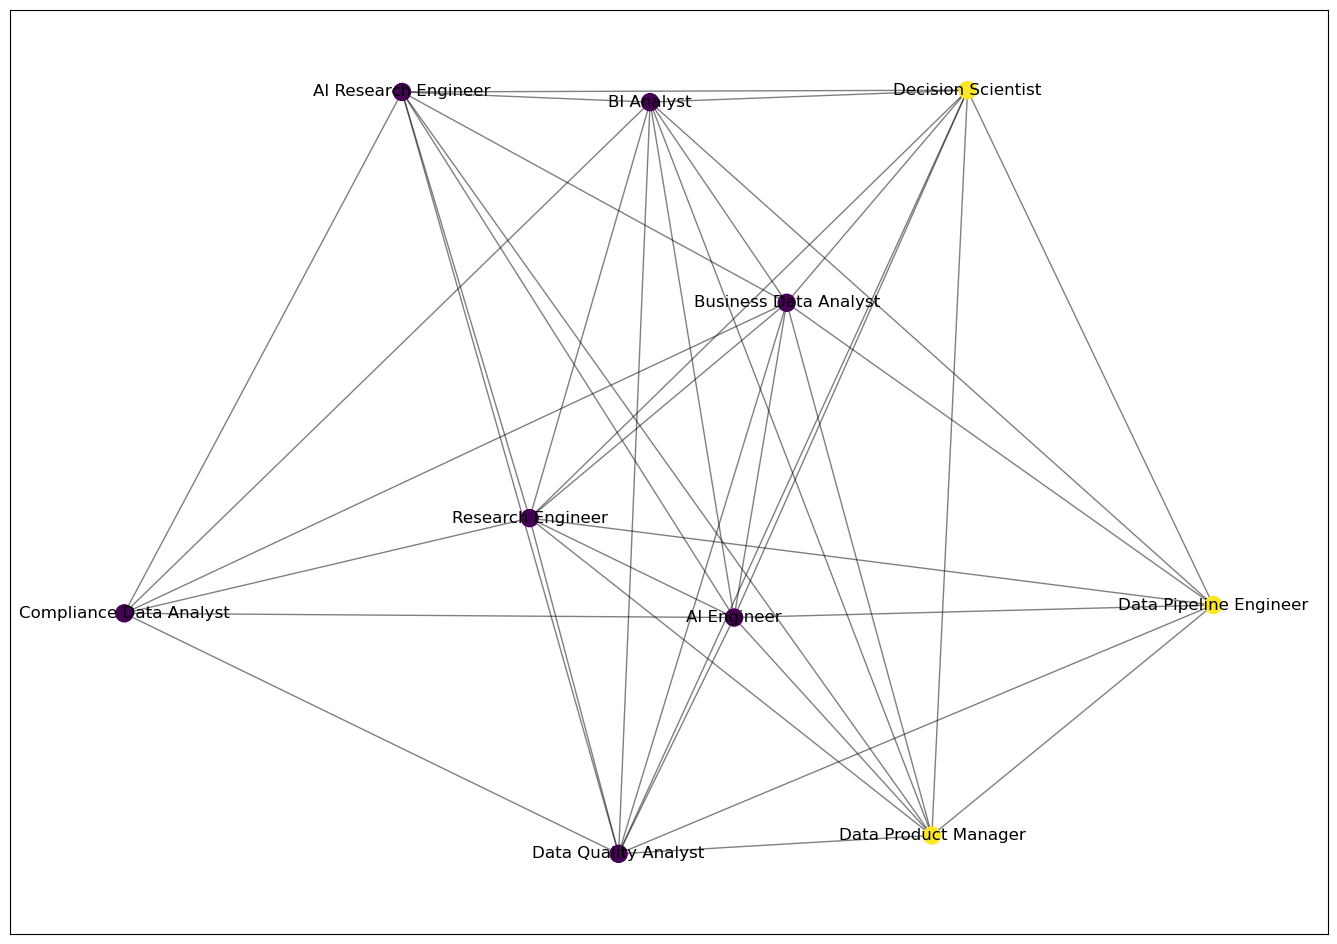

In [26]:
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(17, 12))

partition = community_louvain.best_partition(G1)

pos = nx.spring_layout(G1)

cmap= cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G1, pos, partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G1, pos, alpha=0.5)
nx.draw_networkx_labels(G1, pos)

plt.show()


In [27]:
import numpy as np
values = list(partition.values())

print('Số cụm', len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("-- Cụm ", i+1, " --")
  for name, k in partition.items():
    if k ==i:
      print(name)

Số cụm 2
-- Cụm  1  --
AI Engineer
Business Data Analyst
Compliance Data Analyst
BI Analyst
Research Engineer
Data Quality Analyst
AI Research Engineer
-- Cụm  2  --
Data Product Manager
Decision Scientist
Data Pipeline Engineer


In [28]:
List0 = []
for name, k in partition.items():
  if k==0:
    print(name)
    List0.append(name)
Nhom0 = df.query("job_title in @List0")
Nhom0

AI Engineer
Business Data Analyst
Compliance Data Analyst
BI Analyst
Research Engineer
Data Quality Analyst
AI Research Engineer


,experience_level,job_title
9,EN,Research Engineer
37,EN,AI Research Engineer
50,MI,Business Data Analyst
82,MI,Research Engineer
91,SE,Research Engineer
131,MI,AI Engineer
137,SE,AI Engineer
179,SE,BI Analyst
1421,EX,AI Engineer
2966,MI,AI Research Engineer


In [29]:
List1 = []
for name, k in partition.items():
  if k==1:
    print(name)
    List1.append(name)
Nhom1 = df.query("job_title in @List1")
Nhom1

Data Product Manager
Decision Scientist
Data Pipeline Engineer


,experience_level,job_title
1104,MI,Data Product Manager
1786,SE,Data Product Manager
2743,MI,Decision Scientist
2759,SE,Decision Scientist
4588,SE,Data Pipeline Engineer


In [30]:
# Write the first dataframe to Excel
df.to_excel('Louvain_Cum.xlsx', sheet_name='pah_wikp_combo', index=False, header=True)

# Create an ExcelWriter object in append mode
with pd.ExcelWriter('Louvain_Cum.xlsx', mode='a', engine='openpyxl') as writer:
    # Write the second dataframe to a new sheet
    Nhom0.to_excel(writer, sheet_name='Louvain_Nhom1', index=False, header=True)
    # Write the third dataframe to another new sheet
    Nhom1.to_excel(writer, sheet_name='Louvain_Nhom2', index=False, header=True)

## Girven Newman

[['Data Quality Analyst', 'Decision Scientist', 'Data Product Manager', 'Research Engineer', 'BI Analyst', 'Data Pipeline Engineer', 'AI Research Engineer', 'AI Engineer', 'Business Data Analyst'], ['Compliance Data Analyst']]


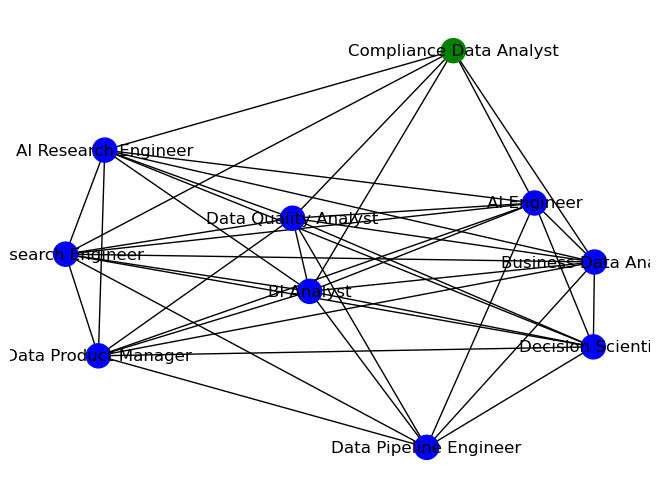

In [31]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G1)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G1:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G1, node_color=color_map, with_labels=True)
plt.show()

In [32]:
ListGV01 = node_groups[0]
ListGV02 = node_groups[1]
Group01 = df.query("job_title in @ListGV01")
Group02 = df.query("job_title in @ListGV02")

In [33]:
df.to_excel (r'GirvanNewman.xlsx', sheet_name='Data', index = False, header=True)
with pd.ExcelWriter('GirvanNewman.xlsx',
                    mode='a') as writer:  
    Group01.to_excel(writer, sheet_name='Girvan_Group01',index = False, header=True)                
    Group02.to_excel(writer, sheet_name='Girvan_Group02',index = False, header=True)

## K-means

In [34]:
df = pd.read_csv("DataScience_salaries_2024.csv", usecols = ['experience_level', 'job_title'])
df.drop_duplicates(inplace = True)

In [35]:
df_k_means = df.loc[df['job_title'].isin(random_nodes)]
df_k_means

,experience_level,job_title
9,EN,Research Engineer
37,EN,AI Research Engineer
50,MI,Business Data Analyst
82,MI,Research Engineer
91,SE,Research Engineer
131,MI,AI Engineer
137,SE,AI Engineer
179,SE,BI Analyst
1104,MI,Data Product Manager
1421,EX,AI Engineer


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [37]:
temp_df = df_k_means.copy()

In [38]:
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [39]:
df_k_means.columns = ['Encode_Experience_Level' if x=='experience_level' else 'Encode_Job_Title' if x=='job_title' else x for x in df_k_means.columns]
df_k_means

,Encode_Experience_Level,Encode_Job_Title
9,EN,Research Engineer
37,EN,AI Research Engineer
50,MI,Business Data Analyst
82,MI,Research Engineer
91,SE,Research Engineer
131,MI,AI Engineer
137,SE,AI Engineer
179,SE,BI Analyst
1104,MI,Data Product Manager
1421,EX,AI Engineer


In [40]:
for col in df_k_means.columns:
    df_k_means[str(col)] = Label_enc(df_k_means[str(col)])

Encode_Experience_Level ['EN' 'EX' 'MI' 'SE']
Encode_Job_Title ['AI Engineer' 'AI Research Engineer' 'BI Analyst' 'Business Data Analyst'
 'Compliance Data Analyst' 'Data Pipeline Engineer' 'Data Product Manager'
 'Data Quality Analyst' 'Decision Scientist' 'Research Engineer']


/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_5357/2382034023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means[str(col)] = Label_enc(df_k_means[str(col)])
/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_5357/2382034023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k_means[str(col)] = Label_enc(df_k_means[str(col)])


In [41]:
df02 = pd.concat([temp_df, df_k_means],axis=1)
df02

,experience_level,job_title,Encode_Experience_Level,Encode_Job_Title
9,EN,Research Engineer,0,9
37,EN,AI Research Engineer,0,1
50,MI,Business Data Analyst,2,3
82,MI,Research Engineer,2,9
91,SE,Research Engineer,3,9
131,MI,AI Engineer,2,0
137,SE,AI Engineer,3,0
179,SE,BI Analyst,3,2
1104,MI,Data Product Manager,2,6
1421,EX,AI Engineer,1,0


In [42]:
X = df02[['Encode_Experience_Level', 'Encode_Job_Title']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

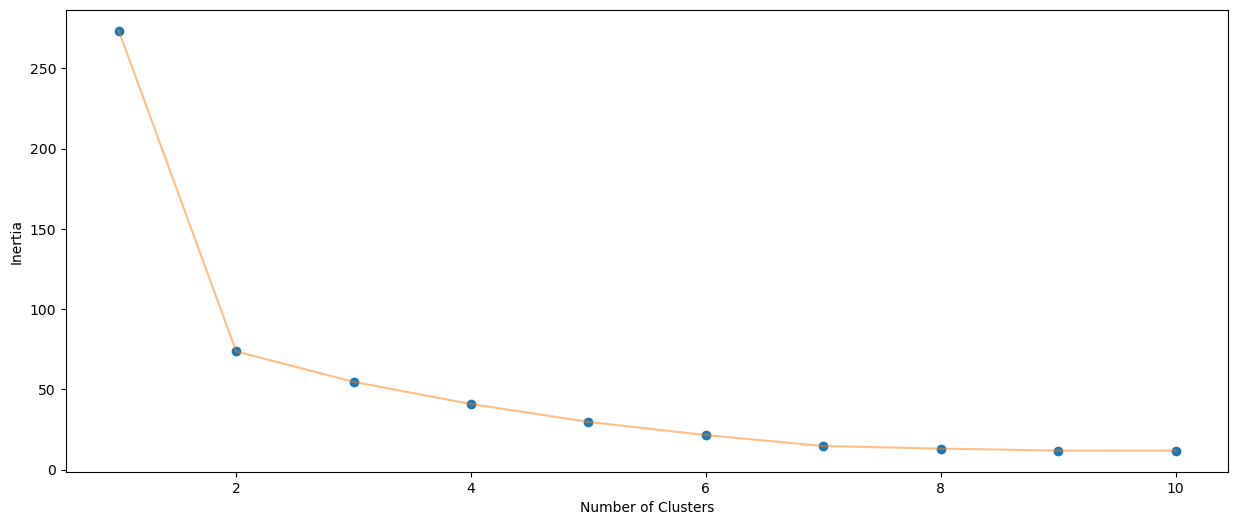

In [43]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [44]:
algorithm = KMeans(n_clusters =2, init='random')
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


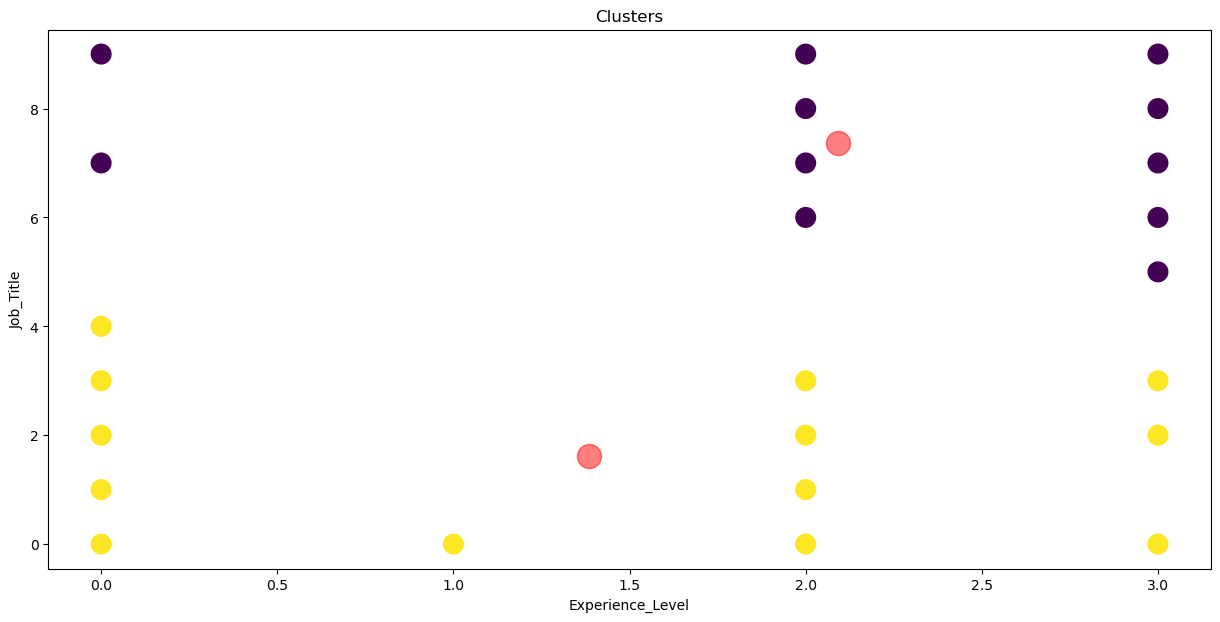

In [45]:
#Biểu diễn kết quả gom cụm
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Encode_Experience_Level', y='Encode_Job_Title', data=df02, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Experience_Level'), plt.ylabel('Job_Title')
plt.title('Clusters')
plt.show()

In [46]:
df02['Clusters'] = algorithm.labels_

df02.to_excel (r'Kmean.xlsx', sheet_name='cluster', index = False, header=True)

Groupkmean0 = df02.query("Clusters == 0")
Groupkmean1 = df02.query("Clusters == 1")
Groupkmean2 = df02.query("Clusters == 2")

with pd.ExcelWriter('Kmean.xlsx',
                    mode='a') as writer:
    Groupkmean0.to_excel(writer, sheet_name='cluster0',index = False, header=True)
    Groupkmean1.to_excel(writer, sheet_name='cluster1',index = False, header=True)
    Groupkmean2.to_excel(writer, sheet_name='cluster2',index = False, header=True)
